In [1]:
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt


In [6]:
#data_path = '/mnt/data4_hdd/peizhi/Datasets/inhouse-blendshapes/IMG_3241-3.2/IMG_3241'
data_path = '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject1/MVI_1810'
file_path = os.path.join(data_path, '1.npz')
loaded_dict = np.load(file_path, allow_pickle=True)
for key in loaded_dict.keys():
    print(key, loaded_dict[key].shape)


shape (1, 300)
exp (1, 100)
head_pose (1, 3)
jaw_pose (1, 3)
neck_pose (1, 3)
eye_pose (1, 6)
tex (1, 50)
light (1, 9, 3)
cam (1, 6)
fov (1,)
K (1, 3, 3)
img_rendered (1, 256, 256, 3)
shape_rendered (1, 256, 256, 3)
mesh_rendered (1, 256, 256, 3)
img (1, 512, 512, 3)
img_aligned (1, 512, 512, 3)
parsing (1, 512, 512)
parsing_aligned (1, 512, 512)
lmks_68 (1, 68, 2)
lmks_ears (1, 20, 2)
lmks_eyes (1, 10, 2)
blendshape_scores (1, 52)


In [8]:
# NOTE: please replace the paths with your tracked data
data_paths = [
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject1/MVI_1810',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject1/MVI_1811',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject1/MVI_1812',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject1/MVI_1814',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject2/MVI_1797',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject2/MVI_1799',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject2/MVI_1801',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject2/MVI_1802',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject3/MVI_test',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/IMAvatar_tracker_4.1/subject3/MVI_train',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/bala',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/biden',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/justin',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/malte_1',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/marcel',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/nf_01',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/nf_03',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/obama',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/person_0004',
    '/mnt/data4_hdd/peizhi/Datasets/avatar-datasets-processed/INSTA_tracker_4.1/wojtek_1',
]

file_paths = []
for data_path in data_paths:
    for fname in os.listdir(data_path):
        if not fname.startswith('.') and fname.endswith('.npz'):
            file_paths.append(os.path.join(data_path, fname))

num_files = len(file_paths)

data_blendshapes = np.zeros([num_files, 52], dtype=np.float32)
data_exp = np.zeros([num_files, 100], dtype=np.float32)
data_jaw_pose = np.zeros([num_files, 3], dtype=np.float32)
data_eye_pose = np.zeros([num_files, 6], dtype=np.float32)

print('Load data ...')
for i in tqdm(range(num_files)):
    loaded_dict = np.load(file_paths[i], allow_pickle=True)
    if loaded_dict is None:
        print(f'File {file_paths[i]} is empty')
        continue
    data_blendshapes[i] = loaded_dict['blendshape_scores']
    data_exp[i] = loaded_dict['exp'][0]
    data_jaw_pose[i] = loaded_dict['jaw_pose'][0]
    data_eye_pose[i] = loaded_dict['eye_pose'][0]


np.save('./data/data_blendshapes.npy', data_blendshapes)
np.save('./data/data_exp.npy', data_exp)
np.save('./data/data_jaw_pose.npy', data_jaw_pose)
np.save('./data/data_eye_pose.npy', data_eye_pose)



Load data ...


100%|██████████| 45971/45971 [09:39<00:00, 79.34it/s] 


In [9]:
# Load the data arrays from the saved .npy files
data_blendshapes = np.load('./data/data_blendshapes.npy')
data_exp = np.load('./data/data_exp.npy')
data_jaw_pose = np.load('./data/data_jaw_pose.npy')
data_eye_pose = np.load('./data/data_eye_pose.npy')


## Mediapipe Blendshape Scores Distribution

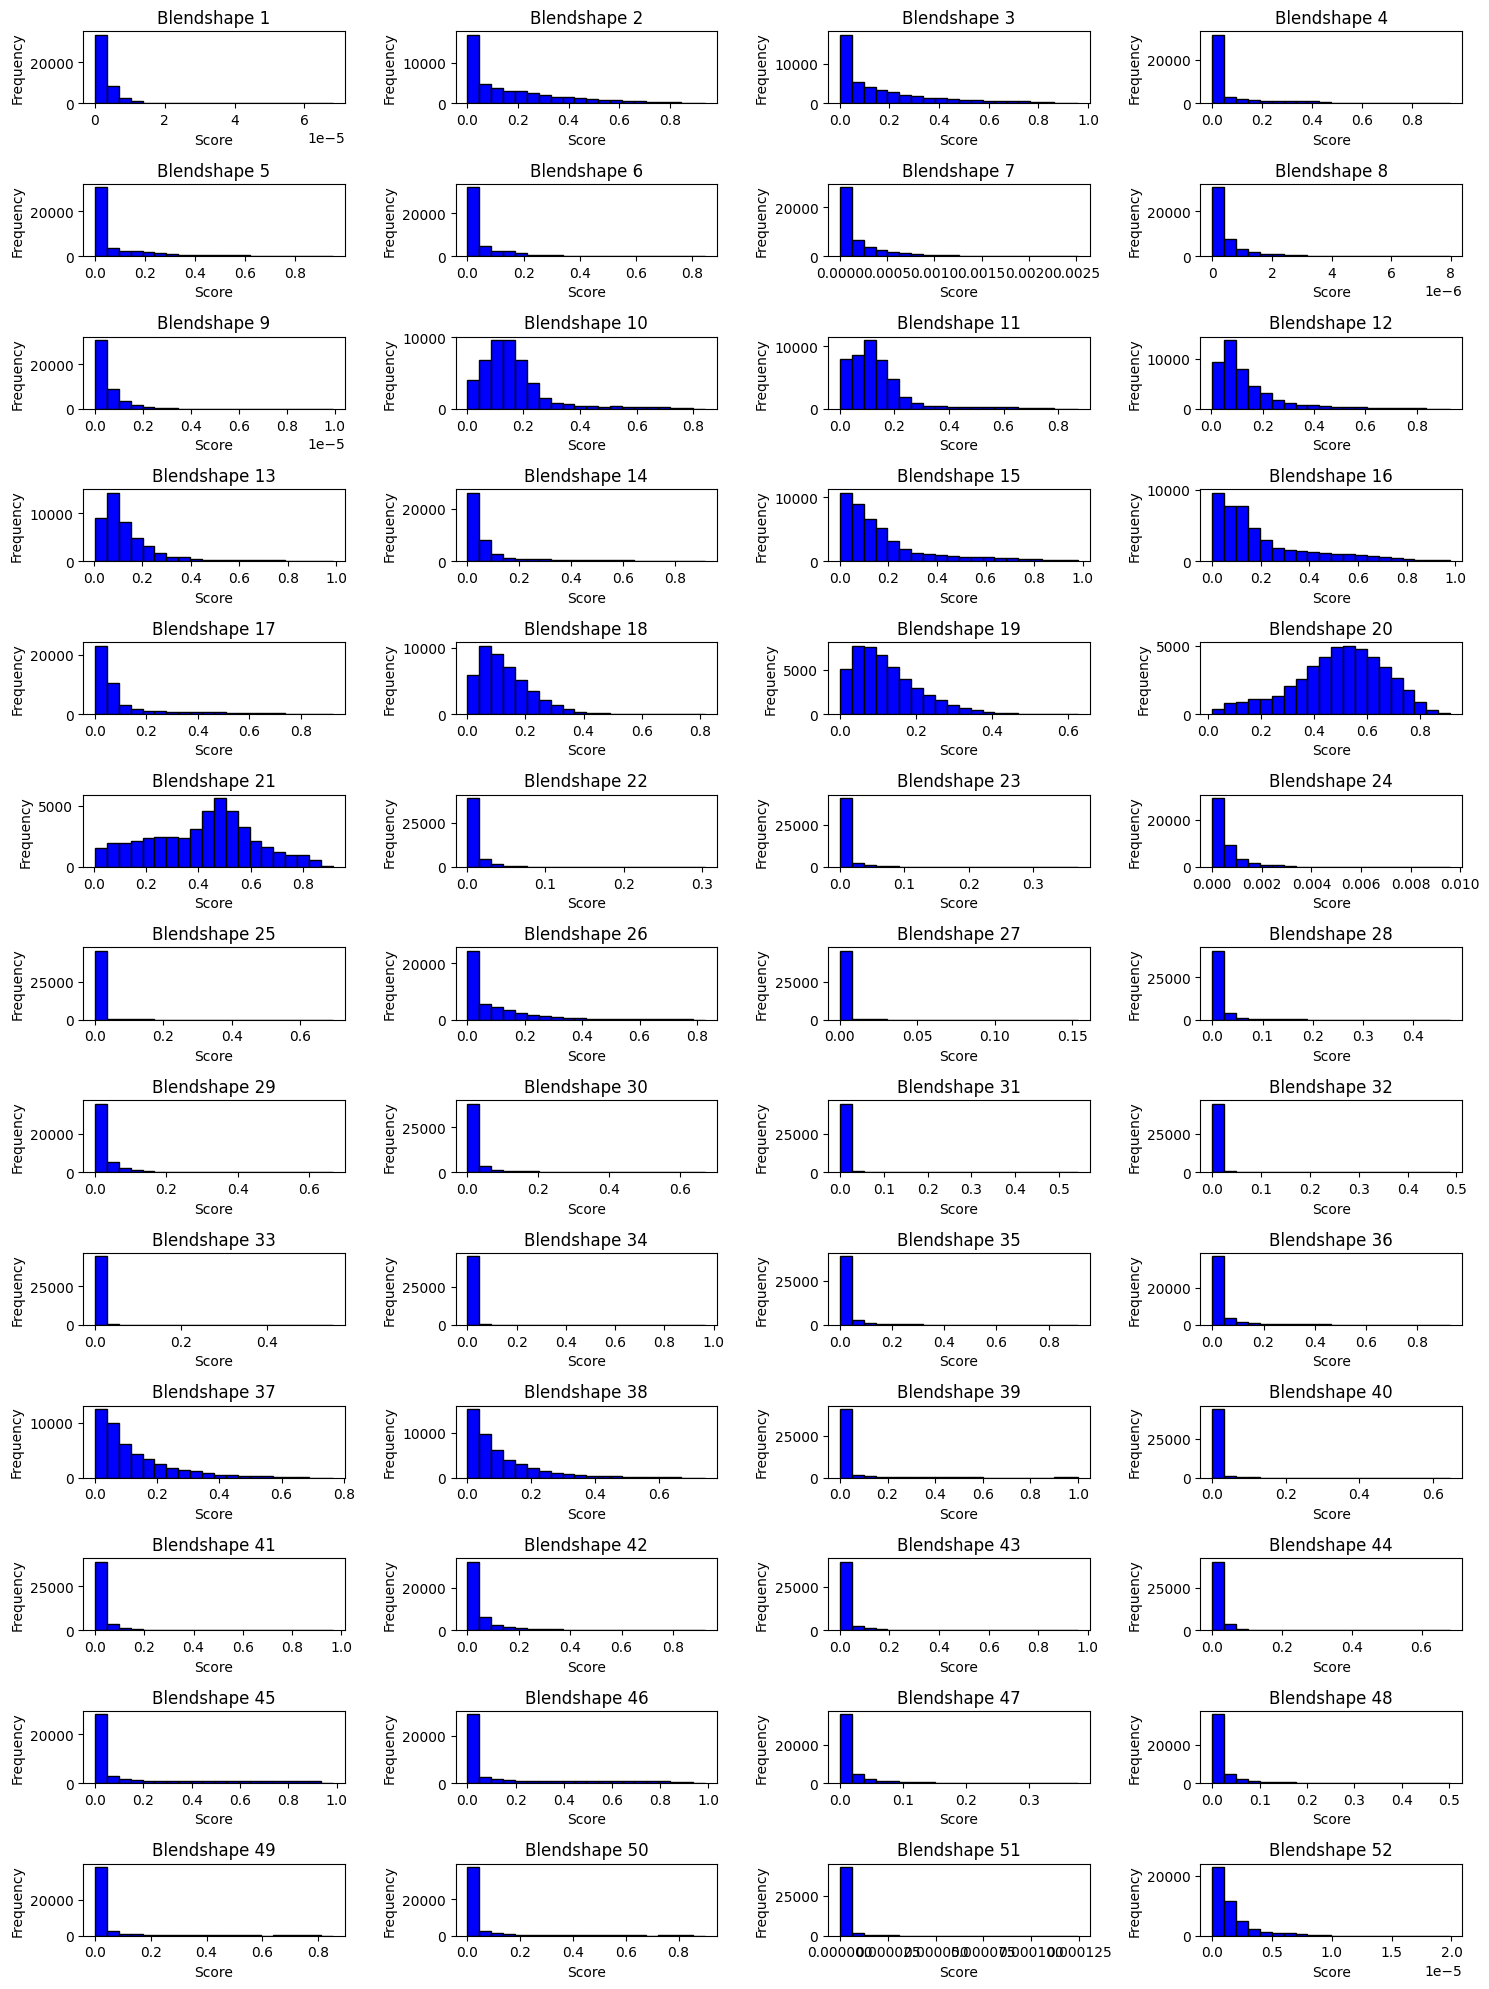

In [10]:
# Set up a figure for the subplots
fig, axes = plt.subplots(nrows=13, ncols=4, figsize=(15, 20))  # 13 rows x 4 columns to display 52 plots
axes = axes.flatten()  # Flatten the axes array to iterate easily

for i in range(52):
    ax = axes[i]
    _ = ax.hist(data_blendshapes[:, i], bins=20, color='blue', edgecolor='black')
    ax.set_title(f'Blendshape {i+1}')
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

# Hide any empty subplots if num_blendshapes < len(axes)
for j in range(52, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## FLAME Expression Coefficients Distribution

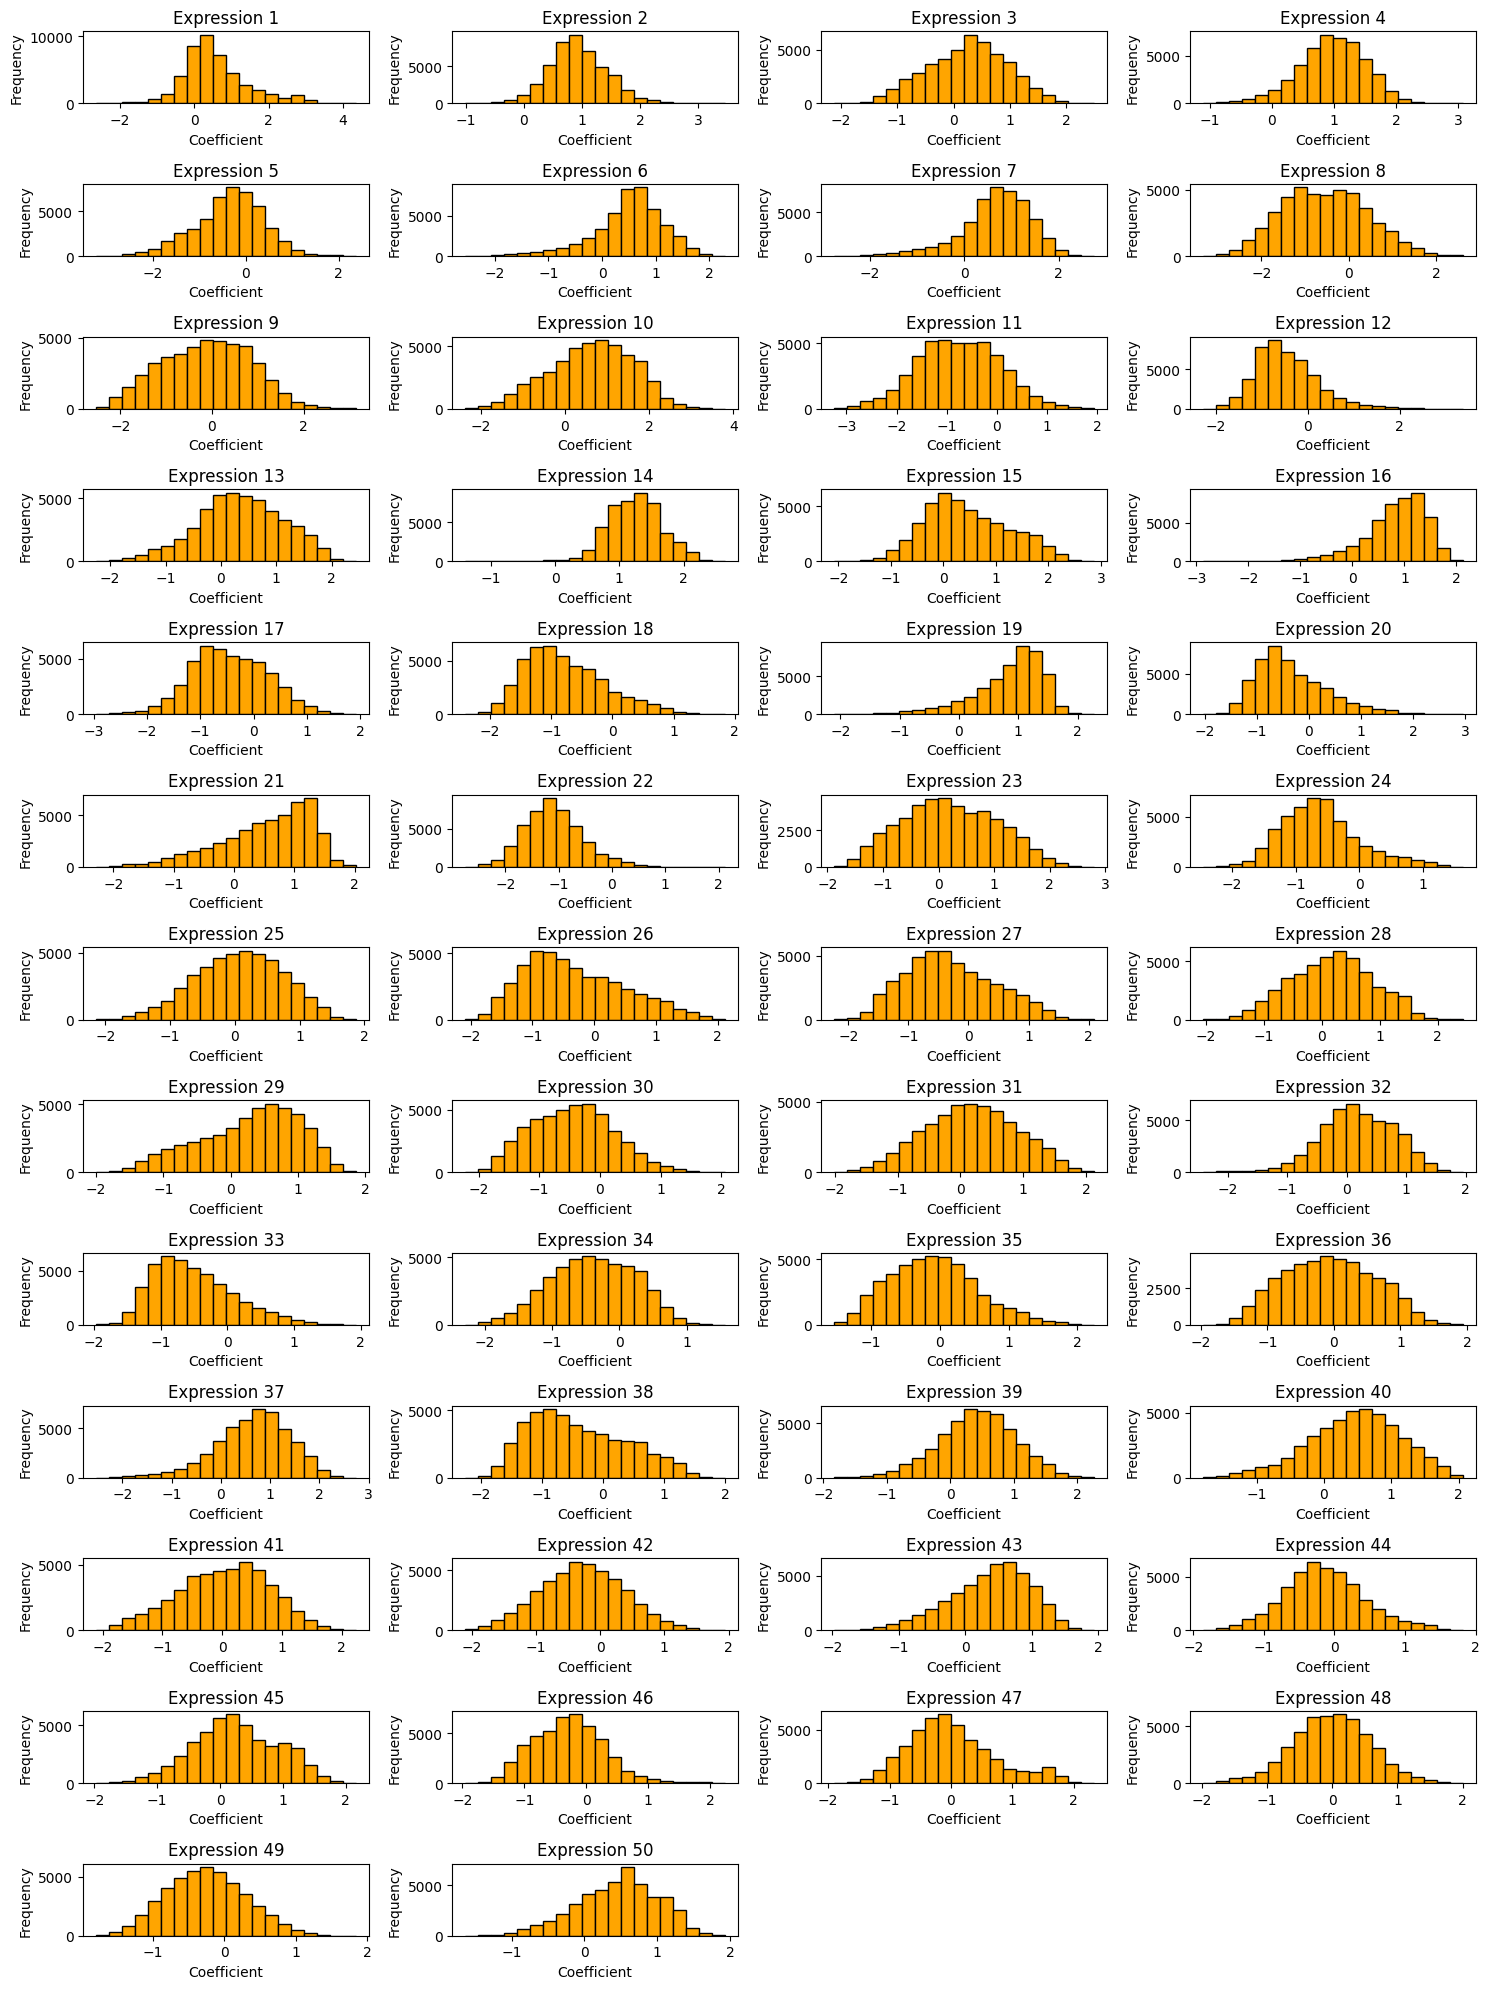

In [11]:
# Set up a figure for the subplots
fig, axes = plt.subplots(nrows=13, ncols=4, figsize=(15, 20))  # 13 rows x 4 columns to display 52 plots
axes = axes.flatten()  # Flatten the axes array to iterate easily

for i in range(50):
    ax = axes[i]
    _ = ax.hist(data_exp[:, i], bins=20, color='orange', edgecolor='black')
    ax.set_title(f'Expression {i+1}')
    ax.set_xlabel('Coefficient')
    ax.set_ylabel('Frequency')

# Hide any empty subplots if num_blendshapes < len(axes)
for j in range(50, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## FLAME Jaw Pose Distribution 

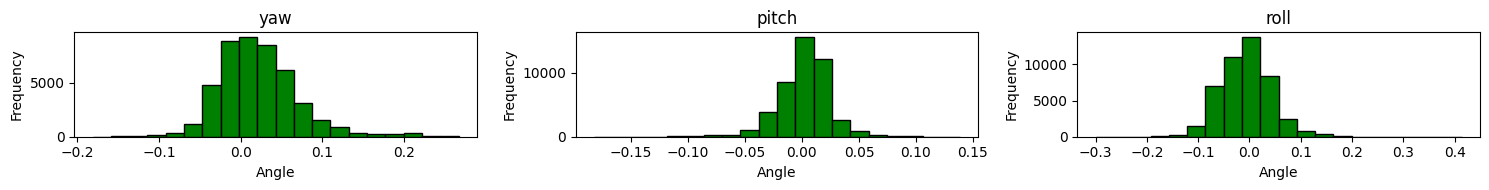

In [12]:
# Set up a figure for the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,2))  # 13 rows x 4 columns to display 52 plots
axes = axes.flatten()  # Flatten the axes array to iterate easily

rotation_names = ['yaw', 'pitch', 'roll']
for i in range(3):
    ax = axes[i-3]
    _ = ax.hist(data_jaw_pose[:, i], bins=20, color='green', edgecolor='black')
    ax.set_title(f'{rotation_names[i-3]}')
    ax.set_xlabel('Angle')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## FLAME Eye Pose Distribution

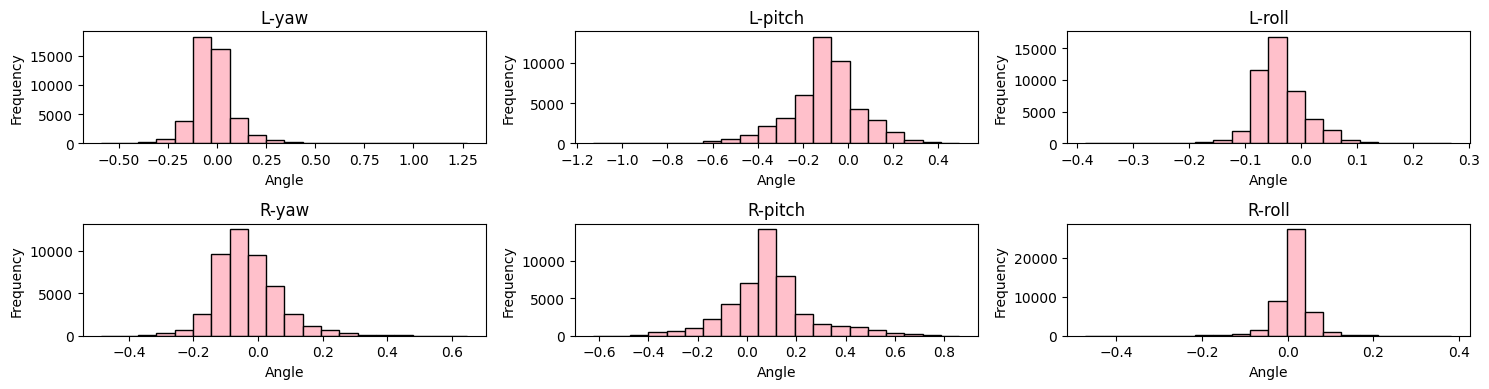

In [13]:
# Set up a figure for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,4))  # 13 rows x 4 columns to display 52 plots
axes = axes.flatten()  # Flatten the axes array to iterate easily

rotation_names = ['L-yaw', 'L-pitch', 'L-roll', 'R-yaw', 'R-pitch', 'R-roll']
for i in range(0,6):
    ax = axes[i]
    _ = ax.hist(data_eye_pose[:, i], bins=20, color='pink', edgecolor='black')
    ax.set_title(f'{rotation_names[i]}')
    ax.set_xlabel('Angle')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()
